[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/estocasticos-udem/curso_2023-1/blob/main/variables_aleatorias/uniforme.ipynb)

In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Distribución uniforme

## Ejemplo 1

Suponga que se lanza un dado no cargado. Responda las siguientes pregunras:
1. ¿Que tipo de distribución sigue?
2. Dibuje la PFM y la CDF asociada al problema.
3. ¿Cual es la probabilidad de que el numero que caiga sea par?
4. ¿Cual es la probabilidad de que el numero que caiga sea menor que 4?
5. ¿Cual es la probabilidad de que el numero que caiga sea 5 o 6?

**Solución punto 1**

Como todos los eventos posibles de este experimento son igualmente probables (pues el dado no es cargado), la distribución de probabilidad asociada al exprerimento es uniforme con parametros $k=1$ y $l=6$. Para este caso sea $X$ la Variable aleatoria como:

$$X:\mathrm{\;Numero\;de\;puntos\;que\;aparecen\;en\;el\;lado\;hacia\;arriba}$$

Tenemos que el rango de esta VA es:

$$x=s_X=\{1,2,3,4,5,6\}$$

Asi tenemos que, $X \sim U(k=1,l=6)$

En python esto es:

In [23]:
"""
Definición de la VA Poisson: X ~ Poisson(alpha)

X: número de panes puestos en la estantería en cinco minutos

# Parametros
a = 5 (alpha)
"""

"""
Definición de la VA Uniforme: X ~ Uniforme(k,l)

X: El numero de puntos de la cara que cae arriba

# Parametros
k = 1 (Valor minimo)
l = 6 (Valor maximo)
"""

k = 1
l = 6
X = stats.randint(low = k, high = l + 1) # Variable aleatoria uniforme

**Solución punto 2**

In [4]:
x = np.arange(11)

# PFM
PFM_X = X.pmf(k = x)
CDF_X = X.cdf(x = x)

# Dataframe
data = {
  "PFM": PFM_X,
  "CDF": CDF_X
}
df = pd.DataFrame(data)
df

,PFM,CDF
0,0.000000,0.000000
1,0.166667,0.166667
2,0.166667,0.333333
3,0.166667,0.500000
4,0.166667,0.666667
5,0.166667,0.833333
6,0.166667,1.000000
7,0.000000,1.000000
8,0.000000,1.000000
9,0.000000,1.000000


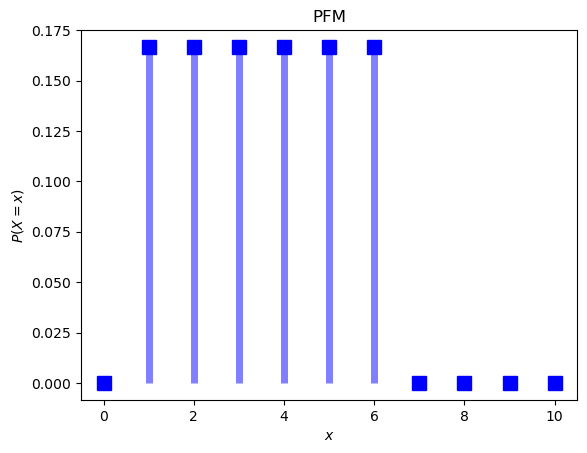

In [15]:
# Grafica de la PMF
plt.title("PFM")
plt.plot(x, PFM_X, 'bs', ms=10)
plt.vlines(x, 0, PFM_X, colors='b', lw = 5, alpha=0.5)
plt.xlabel("$x$")
plt.ylabel("$P(X = x)$")
plt.show()

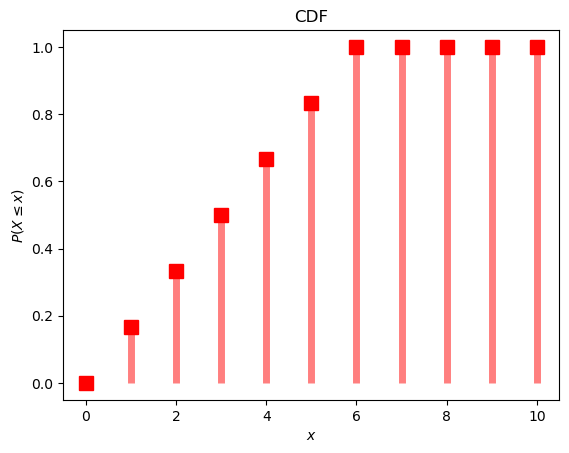

In [16]:
# Grafica de la CDF
plt.title("CDF")
plt.plot(x, CDF_X, 'rs', ms=10)
plt.vlines(x, 0, CDF_X, colors='r', lw = 5, alpha=0.5)
plt.xlabel("$x$")
plt.ylabel("$P(X \leq x)$")
plt.show()

**Solución punto 3**

Al preguntarnos por la probabilidad de que el numero que caiga sea par, nos piden $P(\mathrm{x\;sea\;par})$ es decir:

$$P(\mathrm{x\;sea\;par}) = P(X = 2 | X = 4 | X = 6) = P(X = 2) + P(X = 4) + P(X = 6)$$

In [18]:
P_par = sum(X.pmf([2,4,6]))
print("P(X sea par) = {0:2f}".format(P_par))

P(X sea par) = 0.500000


**Solución punto 4**

La probabilidad de que el numero que caiga sea menor que 4 pide $P(X < 4)$ es decir:

$$P(X < 4) = P(X <= 3) = P(X = 1 | X = 2 | X = 3) = P(X = 1) + P(X = 2) + P(X = 3)$$

In [22]:
# Forma 1
P_men4_f1 = sum(X.pmf(range(1,4)))
print("Forma 1: P(X < 4) = {0:2f}".format(P_men4_f1))
# Forma 2
P_men4_f2 = X.cdf(3)
print("Forma 2: P(X < 4) = {0:2f}".format(P_men4_f2))

Forma 1: P(X < 4) = 0.500000
Forma 2: P(X < 4) = 0.500000


**Solución punto 5**

Al decirno ¿Cual es la probabilidad de que el numero que caiga sea 5 o 6? nos piden $P(X = 5 | X = 6)$ es decir:

$$P(X = 5 | X = 6) = P(X = 5) + P(X = 6) = P(X > 4) = 1 - P(X \leq 4)$$

In [21]:
# Forma 1
P_5o6_f1 = sum(X.pmf([5,6]))
print("Forma 1: P(X = 5 | X = 6) = P(X = 5) + P(X = 6) = {0:2f}".format(P_5o6_f1))
# Forma 2
P_5o6_f2 = 1 - X.cdf(4)
print("Forma 2: P(X = 5 | X = 6) = 1 + P(X \leq 4)  = {0:2f}".format(P_5o6_f2))

Forma 1: P(X = 5 | X = 6) = P(X = 5) + P(X = 6) = 0.333333
Forma 2: P(X = 5 | X = 6) = 1 + P(X \leq 4)  = 0.333333
